In [3]:
import requests
import json

In [8]:
import win32com.client as wincom

# you can insert gaps in the narration by adding sleep calls
import time

speak = wincom.Dispatch("SAPI.SpVoice")

text = "Python text-to-speech test. using win32com.client"
speak.Speak(text)

# 3 second sleep
time.sleep(2) 

text = "This text is read after 2 seconds"
speak.Speak(text)

1

In [10]:
city = input("Enter the name of the city\n")
url = f"https://api.weatherapi.com/v1/current.json?key=b13989793f184149a91141538230103&q={city}"

r = requests.get(url)
wdic = json.loads(r.text)
w = wdic["current"]["temp_c"]

speak.Speak(f"The current weather in {city} is {w} degrees\n")

Enter the name of the city
pune


1

In [12]:
pip install requests python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [58]:
WEATHER_API_KEY = "https://api.weatherapi.com/v1/current.json?key=b13989793f184149a91141538230103&q={city}"

In [59]:
import os
from dotenv import load_dotenv
from IPython.display import display, Markdown

In [68]:
# Load environment variables
load_dotenv()
API_KEY = os.getenv("WEATHER_API_KEY")

# Initialize text-to-speech engine
speak = wincom.Dispatch("SAPI.SpVoice")

def speak_text(text):
    """Speak the given text using TTS."""
    speak.Speak(text)

def get_weather(city):
    """Fetch weather data for a given city."""
    try:
        url = f"https://api.weatherapi.com/v1/current.json?key=b13989793f184149a91141538230103&q={city}&aqi=no"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        speak_text("Unable to fetch weather data. Please check your internet connection or city name.")
        display(Markdown(f"**Error:** {e}"))
        return None

def display_weather(data):
    '''Display weather details.'''
    location = data["location"]
    current = data["current"]
    
    weather_report = (
        f"### Weather Report for {location['name']}, {location['region']}, {location['country']}\n"
        f"- **Temperature:** {current['temp_c']}°C ({current['temp_f']}°F)\n"
        f"- **Condition:** {current['condition']['text']}\n"
        f"- **Humidity:** {current['humidity']}%\n"
        f"- **Wind:** {current['wind_kph']} km/h {current['wind_dir']}\n"
        f"- **Visibility:** {current['vis_km']} km\n"
        f"- **Feels Like:** {current['feelslike_c']}°C\n"
    )
    
    # Display in notebook and speak the result
    display(Markdown(weather_report))
    speak_text(
        f"Weather report for {location['name']}."
        f"The temperature is {current['temp_c']} degrees Celsius. "
        f"The condition is {current['condition']['text']}. "
        f"Humidity is {current['humidity']} percent."
    )

def run_weather_app():
    speak_text("Welcome to the Advanced Weather Application.")
    while True:
        city = input("Enter the name of the city (or type 'exit' to quit):\n")
        if city.lower() == "exit":
            speak_text("Thank you for using the weather application. Goodbye!")
            display(Markdown("**Thank you for using the weather application. Goodbye!**"))
            break
        
        weather_data = get_weather(city)
        if weather_data:
            display_weather(weather_data)
        else:
            speak_text("Failed to fetch weather details. Please try again.")

# Run the weather app in Jupyter
run_weather_app()

Enter the name of the city (or type 'exit' to quit):
Bangalore


### Weather Report for Bangalore, Karnataka, India
- **Temperature:** 20.8°C (69.4°F)
- **Condition:** Clear
- **Humidity:** 81%
- **Wind:** 10.1 km/h NNE
- **Visibility:** 10.0 km
- **Feels Like:** 20.8°C


Enter the name of the city (or type 'exit' to quit):
Mumbai


### Weather Report for Mumbai, Maharashtra, India
- **Temperature:** 24.5°C (76.1°F)
- **Condition:** Clear
- **Humidity:** 60%
- **Wind:** 12.6 km/h NNW
- **Visibility:** 10.0 km
- **Feels Like:** 25.8°C


Enter the name of the city (or type 'exit' to quit):
jaipur


### Weather Report for Jaipur, Rajasthan, India
- **Temperature:** 12.9°C (55.2°F)
- **Condition:** Clear
- **Humidity:** 37%
- **Wind:** 7.2 km/h SE
- **Visibility:** 10.0 km
- **Feels Like:** 12.5°C


Enter the name of the city (or type 'exit' to quit):
kota


### Weather Report for Kota Bharu, Kelantan, Malaysia
- **Temperature:** 24.5°C (76.2°F)
- **Condition:** Partly Cloudy
- **Humidity:** 88%
- **Wind:** 3.6 km/h ESE
- **Visibility:** 10.0 km
- **Feels Like:** 26.9°C


Enter the name of the city (or type 'exit' to quit):
exit


**Thank you for using the weather application. Goodbye!**

In [62]:
pip install scikit-learn matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


Enter the name of the city:
Bangalore


### Historical Weather Data

,date,max_temp_c,min_temp_c,avg_temp_c
0,2024-12-17,21.9,15.2,18.4
1,2024-12-16,25.6,15.3,19.5
2,2024-12-15,25.1,15.9,20.0


Predicted average temperature for the next day: 20.90°C


### Predicted average temperature for the next day: **20.90°C**

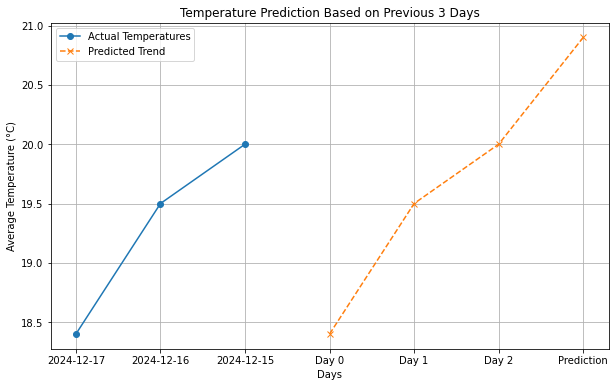

In [63]:
import requests
import os
from dotenv import load_dotenv
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Load environment variables
load_dotenv()
API_KEY = os.getenv("WEATHER_API_KEY")

def get_historical_weather(city, days=3):
    """Fetch the past weather data for a given city."""
    try:
        url = f"https://api.weatherapi.com/v1/history.json?key=b13989793f184149a91141538230103&q={city}&dt="
        weather_data = []
        
        # Get data for the last 'days' days
        for i in range(days):
            date = pd.Timestamp.today() - pd.Timedelta(days=(i + 1))
            response = requests.get(url + date.strftime("%Y-%m-%d"))
            response.raise_for_status()
            data = response.json()
            day_data = data["forecast"]["forecastday"][0]["day"]
            weather_data.append({
                "date": date.strftime("%Y-%m-%d"),
                "max_temp_c": day_data["maxtemp_c"],
                "min_temp_c": day_data["mintemp_c"],
                "avg_temp_c": day_data["avgtemp_c"]
            })
        
        return pd.DataFrame(weather_data)
    except requests.exceptions.RequestException as e:
        print(f"Error fetching historical weather data: {e}")
        return None

def predict_weather(df):
    """Predict the next day's average temperature based on the previous 3 days."""
    # Prepare data
    X = np.arange(len(df)).reshape(-1, 1)  # Days as feature
    y = df["avg_temp_c"].values           # Target variable (avg temperature)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the next day's temperature
    next_day = len(df)
    next_temp = model.predict([[next_day]])
    
    # Display results
    print(f"Predicted average temperature for the next day: {next_temp[0]:.2f}°C")
    display(Markdown(f"### Predicted average temperature for the next day: **{next_temp[0]:.2f}°C**"))
    
    # Plot the temperature trend
    plt.figure(figsize=(10, 6))
    plt.plot(df["date"], y, marker="o", label="Actual Temperatures")
    plt.plot(["Day 0", "Day 1", "Day 2", "Prediction"], np.append(y, next_temp), marker="x", linestyle="--", label="Predicted Trend")
    plt.xlabel("Days")
    plt.ylabel("Average Temperature (°C)")
    plt.title("Temperature Prediction Based on Previous 3 Days")
    plt.legend()
    plt.grid()
    plt.show()

def run_weather_prediction():
    """Run the weather prediction application."""
    city = input("Enter the name of the city:\n")
    historical_data = get_historical_weather(city)
    
    if historical_data is not None:
        display(Markdown("### Historical Weather Data"))
        display(historical_data)
        predict_weather(historical_data)
    else:
        print("Failed to fetch historical data. Please try again.")

# Run the application
run_weather_prediction()

Enter the name of the city:
Bangalore


### Historical Weather Data

,date,max_temp_c,min_temp_c,avg_temp_c
0,2024-12-17,21.9,15.2,18.4
1,2024-12-16,25.6,15.3,19.5
2,2024-12-15,25.1,15.9,20.0


Predicted average temperature for the next day: 20.90°C


### Predicted average temperature for the next day: **20.90°C**

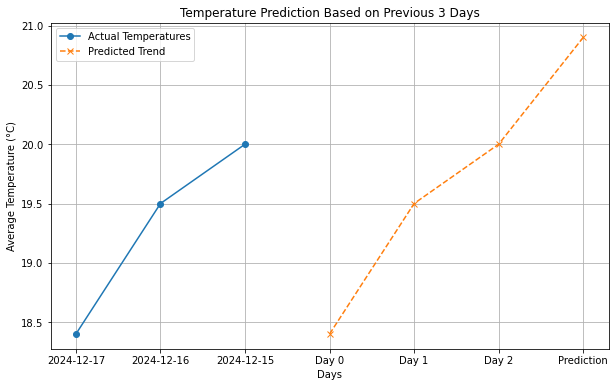

Predicted temperature for Day 3: 20.60°C
Actual temperature for Day 3: 20.00°C
Mean Absolute Error (MAE): 0.20
Root Mean Squared Error (RMSE): 0.35


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(df):
    """Evaluate the model accuracy using backtesting."""
    # Prepare data
    X = np.arange(len(df)).reshape(-1, 1)
    y = df["avg_temp_c"].values
    
    # Train the model on the first two days
    model = LinearRegression()
    model.fit(X[:-1], y[:-1])  # Use all but the last day for training
    
    # Predict the temperature for the third day
    y_pred = model.predict(X)
    predicted_third_day = y_pred[-1]
    
    # Calculate error metrics
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # Display results
    print(f"Predicted temperature for Day 3: {predicted_third_day:.2f}°C")
    print(f"Actual temperature for Day 3: {y[-1]:.2f}°C")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    return mae, rmse

def run_weather_prediction_with_accuracy():
    """Run the weather prediction application with model evaluation."""
    city = input("Enter the name of the city:\n")
    historical_data = get_historical_weather(city)
    
    if historical_data is not None:
        display(Markdown("### Historical Weather Data"))
        display(historical_data)
        
        # Predict and evaluate
        predict_weather(historical_data)
        evaluate_model(historical_data)
    else:
        print("Failed to fetch historical data. Please try again.")

# Run the application
run_weather_prediction_with_accuracy()

Enter the name of the city:
Bhopal


### Historical Weather Data

,date,max_temp_c,min_temp_c,avg_temp_c
0,2024-12-17,25.6,11.8,17.8
1,2024-12-16,25.2,10.9,17.0
2,2024-12-15,24.8,10.8,16.7


Predicted average temperature for the next day: 16.07°C


### Predicted average temperature for the next day: **16.07°C**

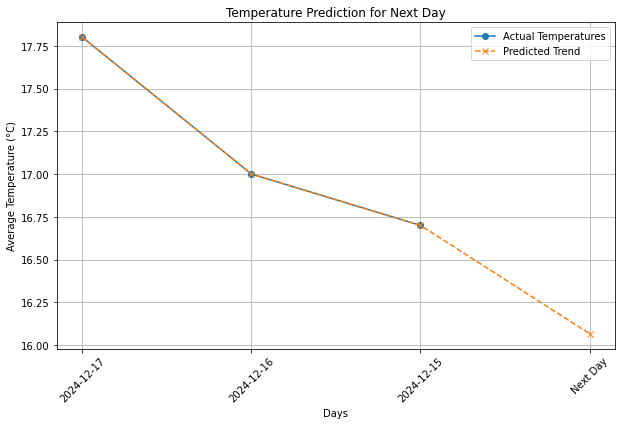

The predicted average temperature for Bhopal tomorrow is 16.07°C.


In [65]:
def predict_next_day_temperature(df):
    """Predict the average temperature for the next day."""
    # Prepare data
    X = np.arange(len(df)).reshape(-1, 1)  # Days as feature (0, 1, 2 for 3 days)
    y = df["avg_temp_c"].values           # Target variable (avg temperatures)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict temperature for the next day (Day 3)
    next_day = len(df)  # The index of the next day
    next_temp = model.predict([[next_day]])
    
    # Display results
    print(f"Predicted average temperature for the next day: {next_temp[0]:.2f}°C")
    display(Markdown(f"### Predicted average temperature for the next day: **{next_temp[0]:.2f}°C**"))
    
    # Plot the temperature trend
    plt.figure(figsize=(10, 6))
    plt.plot(df["date"], y, marker="o", label="Actual Temperatures")
    future_days = df["date"].tolist() + ["Next Day"]
    future_temps = np.append(y, next_temp)
    plt.plot(future_days, future_temps, marker="x", linestyle="--", label="Predicted Trend")
    plt.xlabel("Days")
    plt.ylabel("Average Temperature (°C)")
    plt.title("Temperature Prediction for Next Day")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

    return next_temp[0]

def run_next_day_prediction():
    """Run the prediction for the next day's temperature."""
    city = input("Enter the name of the city:\n")
    historical_data = get_historical_weather(city)
    
    if historical_data is not None:
        display(Markdown("### Historical Weather Data"))
        display(historical_data)
        
        # Predict and display the next day's temperature
        next_day_temp = predict_next_day_temperature(historical_data)
        print(f"The predicted average temperature for {city} tomorrow is {next_day_temp:.2f}°C.")
    else:
        print("Failed to fetch historical data. Please try again.")

# Run the application
run_next_day_prediction()

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

Enter the name of the city:
Mumbai


### Hourly Weather Data for the Last 3 Days

,datetime,hour,temp_c
0,2024-12-17 00:00,0,24.0
1,2024-12-17 01:00,1,23.7
2,2024-12-17 02:00,2,23.4
3,2024-12-17 03:00,3,23.2
4,2024-12-17 04:00,4,22.9
...,...,...,...
67,2024-12-15 19:00,19,25.7
68,2024-12-15 20:00,20,25.6
69,2024-12-15 21:00,21,25.4
70,2024-12-15 22:00,22,25.1


### Predicted Hourly Temperatures for Next Day

,hour,predicted_temp_c
0,0,23.766889
1,1,23.882932
2,2,23.998976
3,3,24.115019
4,4,24.231063
5,5,24.347106
6,6,24.463150
7,7,24.579193
8,8,24.695237
9,9,24.811280


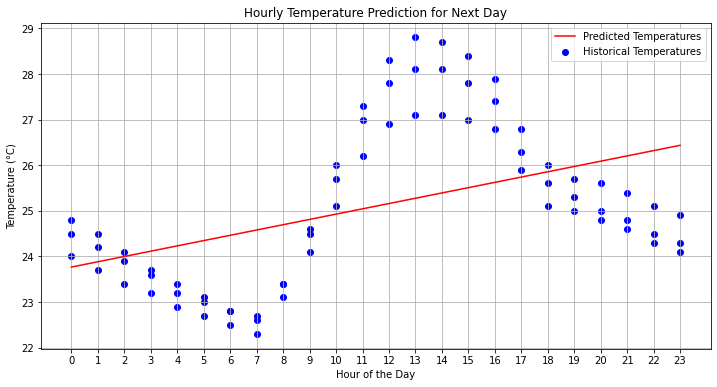

Hourly predictions completed successfully!


In [67]:
def get_hourly_weather(city):
    """Fetch hourly weather data for the past three days."""
    api_key = "b13989793f184149a91141538230103"
    base_url = f"https://api.weatherapi.com/v1/history.json?key=b13989793f184149a91141538230103&q={city}"
    
    # Fetch data for the past three days
    historical_data = []
    for i in range(1, 4):  # Last 3 days
        date = (pd.Timestamp.now() - pd.Timedelta(days=i)).strftime("%Y-%m-%d")
        url = f"{base_url}&dt={date}"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            for hour in data["forecast"]["forecastday"][0]["hour"]:
                historical_data.append({
                    "datetime": hour["time"],
                    "hour": int(hour["time"].split()[-1].split(":")[0]),
                    "temp_c": hour["temp_c"]
                })
        else:
            print(f"Failed to fetch data for {date}.")
            return None

    return pd.DataFrame(historical_data)

def predict_next_day_hourly(df):
    """Predict hourly temperature for the next day."""
    # Prepare data
    df["hour"] = df["hour"] % 24  # Ensure hour stays within [0, 23]
    X = df["hour"].values.reshape(-1, 1)
    y = df["temp_c"].values

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict temperatures for the next day (24 hours)
    next_day_hours = np.arange(0, 24).reshape(-1, 1)
    predicted_temps = model.predict(next_day_hours)

    # Display predictions
    next_day_df = pd.DataFrame({
        "hour": next_day_hours.flatten(),
        "predicted_temp_c": predicted_temps
    })
    display(Markdown("### Predicted Hourly Temperatures for Next Day"))
    display(next_day_df)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.scatter(df["hour"], y, color="blue", label="Historical Temperatures")
    plt.plot(next_day_hours, predicted_temps, color="red", label="Predicted Temperatures")
    plt.title("Hourly Temperature Prediction for Next Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Temperature (°C)")
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid()
    plt.show()

    return next_day_df

def run_hourly_prediction():
    """Run the application to predict hourly temperatures."""
    city = input("Enter the name of the city:\n")
    hourly_data = get_hourly_weather(city)
    
    if hourly_data is not None:
        display(Markdown("### Hourly Weather Data for the Last 3 Days"))
        display(hourly_data)
        
        # Predict and display hourly temperatures for the next day
        next_day_prediction = predict_next_day_hourly(hourly_data)
        print("Hourly predictions completed successfully!")
    else:
        print("Failed to fetch hourly data. Please try again.")

# Run the application
run_hourly_prediction()

Enter the name of the city:
Pune


### Hourly Weather Data for the Last 3 Days

,datetime,hour,temp_c
0,2024-12-17 00:00,0,16.1
1,2024-12-17 01:00,1,15.7
2,2024-12-17 02:00,2,15.3
3,2024-12-17 03:00,3,14.8
4,2024-12-17 04:00,4,14.3
...,...,...,...
67,2024-12-15 19:00,19,20.4
68,2024-12-15 20:00,20,19.8
69,2024-12-15 21:00,21,19.0
70,2024-12-15 22:00,22,17.7


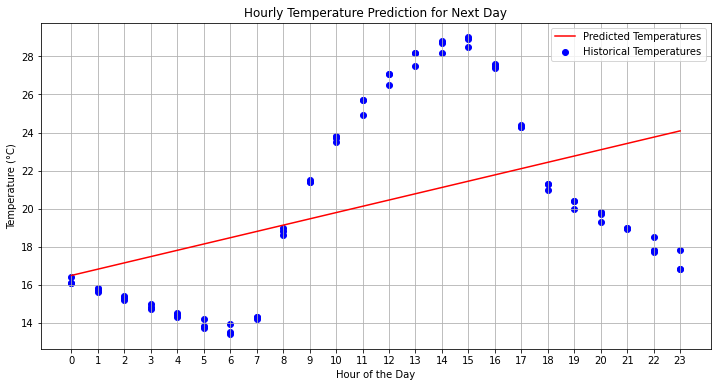

In [57]:
import requests
import pandas as pd
import numpy as np
import time
import win32com.client as wincom
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Initialize text-to-speech engine
speak = wincom.Dispatch("SAPI.SpVoice")

# Function to speak text
def speak_text(text):
    speak.Speak(text)

# Function to get hourly weather data for the past 3 days
def get_hourly_weather(city):
    """Fetch hourly weather data for the past three days."""
    api_key = "b13989793f184149a91141538230103"
    base_url = f"https://api.weatherapi.com/v1/history.json?key={api_key}&q={city}"
    
    # Fetch data for the past three days
    historical_data = []
    for i in range(1, 4):  # Last 3 days
        date = (pd.Timestamp.now() - pd.Timedelta(days=i)).strftime("%Y-%m-%d")
        url = f"{base_url}&dt={date}"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            for hour in data["forecast"]["forecastday"][0]["hour"]:
                historical_data.append({
                    "datetime": hour["time"],
                    "hour": int(hour["time"].split()[-1].split(":")[0]),
                    "temp_c": hour["temp_c"]
                })
        else:
            print(f"Failed to fetch data for {date}.")
            return None

    return pd.DataFrame(historical_data)

# Function to predict hourly temperatures for the next day
def predict_next_day_hourly(df):
    """Predict hourly temperature for the next day."""
    # Prepare data
    df["hour"] = df["hour"] % 24  # Ensure hour stays within [0, 23]
    X = df["hour"].values.reshape(-1, 1)
    y = df["temp_c"].values

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict temperatures for the next day (24 hours)
    next_day_hours = np.arange(0, 24).reshape(-1, 1)
    predicted_temps = model.predict(next_day_hours)

    # Display predictions
    next_day_df = pd.DataFrame({
        "hour": next_day_hours.flatten(),
        "predicted_temp_c": predicted_temps
    })

    # Announce each hour's predicted temperature
    for index, row in next_day_df.iterrows():
        hour = row["hour"]
        temp = row["predicted_temp_c"]
        speak_text(f"The predicted temperature for {hour} hour is {temp:.2f} degrees Celsius.")
        time.sleep(1)  # Sleep for 1 second between each prediction

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.scatter(df["hour"], y, color="blue", label="Historical Temperatures")
    plt.plot(next_day_hours, predicted_temps, color="red", label="Predicted Temperatures")
    plt.title("Hourly Temperature Prediction for Next Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Temperature (°C)")
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid()
    plt.show()

    return next_day_df

# Function to run the hourly prediction
def run_hourly_prediction():
    """Run the application to predict hourly temperatures."""
    city = input("Enter the name of the city:\n")
    speak_text(f"Fetching weather data for {city}.")
    
    hourly_data = get_hourly_weather(city)
    
    if hourly_data is not None:
        display(Markdown("### Hourly Weather Data for the Last 3 Days"))
        display(hourly_data)
        
        # Predict and display hourly temperatures for the next day
        next_day_prediction = predict_next_day_hourly(hourly_data)
        speak_text("Hourly temperature predictions completed successfully.")
    else:
        speak_text("Failed to fetch hourly data. Please try again.")

# Run the application
run_hourly_prediction()